In [2]:
import rasterio
import os
import numpy as np
import torch
from PIL import Image
import fastai
from fastai.vision.all import *
from tkinter import *
import matplotlib.pyplot as plt
import matplotlib.colors
import tkinter as tk
from tkinter import filedialog, Label, ttk

# Разрешаем деление на 0 для расчета индексов
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [10]:
band_blue_file = "data/blue_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif"
band_green_file = "data/green_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif"
band_red_file = "data/red_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif"
band_nir_file = "data/nir_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(band_blue_file) as src:
    band_blue = src.read(1).astype(float)

with rasterio.open(band_green_file) as src:
    band_green = src.read(1).astype(float)

with rasterio.open(band_red_file) as src:
    band_red = src.read(1).astype(float)

with rasterio.open(band_nir_file) as src:
    band_nir = src.read(1).astype(float)
    
full = np.array([band_blue, band_green, band_red, band_nir])
full.shape

# Create the file
# from PIL import Image
import tifffile
tifffile.imsave("data/full_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif", full) 


C:\Users\smart\AppData\Local\Temp\ipykernel_800\508667102.py:25: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("data/full_patch_120_6_by_10_LC08_L1TP_066012_20160520_20170223_01_T1.tif", full)


In [34]:
band_full_file = "data/full_patch_224_11_by_14_LC08_L1TP_045019_20160720_20170221_01_T1.tif"

with rasterio.open(band_full_file) as src:
    band_full = src.read()

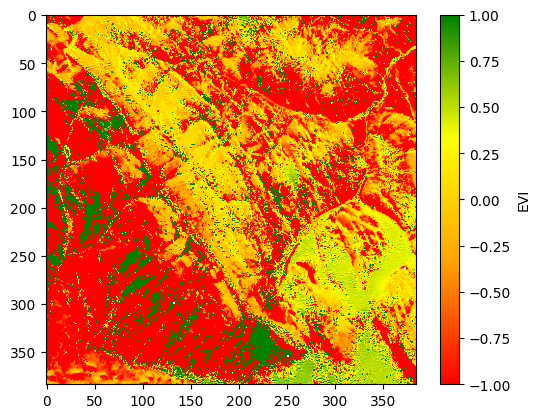

In [17]:
window = Tk()
window.title('Vegetation indexes calculator')
window.geometry('800x600')

frame = Frame(
   window,
   padx = 10,
   pady = 10
)
frame.pack(expand=True) 

# Справочный текст для выбора индекса
indexes_lb = Label(frame, text="Выберите индекс для расчета: ")
indexes_lb.grid(row=3, column=1)

# Список индексов на выбор
indexes = ["NDVI", "SAVI", "MSAVI", "GNDVI", "NDWI", "ARVI", "RVI", "EVI"]
combobox = ttk.Combobox(frame, values=indexes, state="readonly")
combobox.grid(row=3, column=2, sticky="W", padx=10, pady=10)

# Справочный тест для загрузки изображения
image_load_lb = Label(frame, text="Загрузите изображение для расчета ")
image_load_lb.grid(row=6, column=1)

# Кнопка загрузки изображений
uploadButton = tk.Button(frame, text='Open', activebackground="blue", activeforeground="white", command=imageUploader)
uploadButton.grid(row=6, column=2, sticky="W", padx=10, pady=10)

# Кнопка расчета
culcButton = tk.Button(window, text='Calculate', activebackground="blue", activeforeground="white", command=calculate)
culcButton.pack(side=tk.BOTTOM, pady=10)

window.mainloop()

In [16]:
# Функция загрузки изображеня
def imageUploader():
    fileTypes = [('Image files', '*.tif')] #*.png;*.jpg;*.jpeg;
    global path
    path = filedialog.askopenfilename(filetypes=fileTypes)

# Функция расчета индексов
def calculate():
    # Создаем новое окно для отображения
    global last_culc
    index = combobox.get()
    window_culc = Tk()
    window_culc.geometry('800x600')
    
    # Если выбран NDVI
    if index == 'NDVI':
        window_culc.title('NDVI culculation') # название окна
        ndvi = NDVI_culc(path) # расчет индекса
        last_culc = ndvi # глобальная переменная для сохранения результата
        plot_index(ndvi, "NDVI") # построение графика matplotlib
        
    # Если выбран SAVI
    if index == 'SAVI':
        window_culc.title('SAVI culculation') # название окна
        savi = SAVI_culc(path) # расчет индекса
        last_culc = savi # глобальная переменная для сохранения результата
        plot_index(savi, "SAVI") # построение графика matplotlib
        
    # Если выбран MSAVI
    if index == 'MSAVI':
        window_culc.title('MSAVI culculation') # название окна
        msavi = MSAVI_culc(path) # расчет индекса
        last_culc = msavi # глобальная переменная для сохранения результата
        plot_index(msavi, "MSAVI") # построение графика matplotlib   
         
    # Если выбран GNDVI
    if index == 'GNDVI':
        window_culc.title('GNDVI culculation') # название окна
        gndvi = GNDVI_culc(path) # расчет индекса
        last_culc = gndvi # глобальная переменная для сохранения результата
        plot_index(gndvi, "GNDVI") # построение графика matplotlib   
        
    # Если выбран NDWI
    if index == 'NDWI':
        window_culc.title('NDWI culculation') # название окна
        ndwi = NDWI_culc(path) # расчет индекса
        last_culc = ndwi # глобальная переменная для сохранения результата
        plot_index(ndwi, "NDWI") # построение графика matplotlib 
        
    # Если выбран ARVI
    if index == 'ARVI':
        window_culc.title('ARVI culculation') # название окна
        arvi = ARVI_culc(path) # расчет индекса
        last_culc = arvi # глобальная переменная для сохранения результата
        plot_index(arvi, "ARVI") # построение графика matplotlib    
        
    # Если выбран RVI
    if index == 'RVI':
        window_culc.title('RVI culculation') # название окна
        rvi = RVI_culc(path) # расчет индекса
        last_culc = rvi # глобальная переменная для сохранения результата
        plot_index(rvi, "RVI", 0, 100) # построение графика matplotlib    
        
    # Если выбран EVI
    if index == 'EVI':
        window_culc.title('EVI culculation') # название окна
        evi = EVI_culc(path) # расчет индекса
        last_culc = evi # глобальная переменная для сохранения результата
        plot_index(evi, "EVI") # построение графика matplotlib    
        
    # Загрузка изображения для отображения
    image = PhotoImage(file="data/1.png", master=window_culc)
    image_label = tk.Label(window_culc, image=image)
    image_label.pack(side=tk.TOP, pady=10)
    
    # Кнопка помощи
    helpButton = tk.Button(window_culc, text='Help', activebackground="blue", activeforeground="white", command=help_ind)
    helpButton.pack(side=tk.RIGHT, padx=10, pady=10)

    # Кнопка сохранения tif
    saveButton = tk.Button(window_culc, text='Save tif', activebackground="blue", activeforeground="white", command=save_tif)
    saveButton.pack(side=tk.RIGHT, padx=10, pady=10)
    
    # Кнопка сохранения png
    saveButton = tk.Button(window_culc, text='Save png', activebackground="blue", activeforeground="white", command=save_png)
    saveButton.pack(side=tk.RIGHT, padx=10, pady=10)
    
    window_culc.mainloop()

In [12]:
# Функция для получения предсказания модели сегментации облаков
def get_prediction(img_path):
    db = DataBlock(blocks=(ImageBlock, MaskBlock),
               splitter=RandomSplitter(valid_pct=0.2)
              )
    items = get_files(Path(), extensions='.TIF')
    dl = db.dataloaders(bs=1, num_workers=0, source=items)

    def acc_metric(input, target):
        target = target.squeeze(1)
        return (input.argmax(dim=1)==target).float().mean()

    def loss_fn(pred, targ):
        targ[targ==255] = 1
        return torch.nn.functional.cross_entropy(pred, targ.squeeze(1).type(torch.long))

    learn = unet_learner(dl, resnet34, n_in=4, n_out=2, 
                                pretrained=False, 
                                loss_func=loss_fn, 
                                metrics=acc_metric)
    
    learn.load('model.learner')
    
    with rasterio.open(img_path) as src:
        img = src.read()
    tensor = TensorImage(img)
    pred = learn.predict(tensor)
    pred_1 = pred[0]
    pred_arx = pred_1.argmax(dim=0)
    
    return pred_arx
    
# Функция построение графика matplotlib
def plot_index(index_culc, index_name, norm_min=-1, norm_max=1):
           
    if os.path.exists('./data')==False:
        os.makedirs('./data') 
        
    fig, ax = plt.subplots(num=1,clear=True)
    norm = plt.Normalize(norm_min, norm_max, clip=True)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow","green"])
    # mask = get_prediction(path)
    # masked = np.ma.masked_where(mask == 1, index_culc)
    # plt.imshow(masked, norm=norm, cmap=cmap)
    plt.imshow(index_culc, norm=norm, cmap=cmap)
    plt.colorbar(label=index_name)
    plt.savefig('data/1.png')
    
# Функция справки для различных индексов
def help_ind():
    
    # Создаем новое окно
    index = combobox.get()
    index_help = index + '_help'
    window_help = Tk()
    window_help.geometry('800x600')

    window_help.title(index_help)
    with open('help/' + index_help + '.txt', encoding="utf-8") as src:
        help = src.read()
     
    # Виджет для отображения текста       
    text_widget = tk.Text(window_help, height=500, width=700)
    text_widget.pack(pady=10)
    text_widget.insert(END, help)
    
    window_help.mainloop()

# Функция сохранения tif файла   
def save_tif():
    fileTypes = [('Image files', '*.tif')] #*.png;*.jpg;*.jpeg;
    path = filedialog.asksaveasfilename(filetypes=fileTypes)
    
    kwargs = src.meta
    kwargs.update(
        dtype=rasterio.float32,
        count = 1)

    with rasterio.open(path + '.tif', 'w', **kwargs) as dst:
        dst.write_band(1, last_culc.astype(rasterio.float32))
        
# Функция сохранения png файла   
def save_png():
    fileTypes = [('Image files', '*.png')] #*.png;*.jpg;*.jpeg;
    path = filedialog.asksaveasfilename(filetypes=fileTypes)

    plt.savefig(path + '.png')

In [5]:
# Функция расчета NDVI
def NDVI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет NDVI
    ndvi = (band_nir - band_red) / (band_nir + band_red)
    return ndvi

# Функция расчета SAVI
def SAVI_culc(img_path, L=0.5):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет SAVI
    savi = ((band_nir - band_red) * (1 + L)) / (band_nir + band_red + L)
    return savi

# Функция расчета MSAVI
def MSAVI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет MSAVI
    L = 1 - (2*band_nir+1-np.sqrt((2*band_nir+1)*(2*band_nir+1)-8*(band_nir-band_red)))/2
    msavi = ((band_nir - band_red) * (1 + L)) / (band_nir + band_red + L)
    return msavi

# Функция расчета GNDVI
def GNDVI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_green = src.read(2).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет GNDVI
    gndvi = (band_nir - band_green) / (band_nir + band_green)
    return gndvi

# Функция расчета NDWI
def NDWI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_green = src.read(2).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет NDWI
    ndwi = (band_green - band_nir) / (band_green + band_nir)
    return ndwi

# Функция расчета ARVI
def ARVI_culc(img_path, alpha=1):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_blue = src.read(1).astype(float)
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет ARVI
    arvi = (band_nir - 2*band_red + band_blue) / (band_nir + 2*band_red + band_blue)
    return arvi

# Функция расчета RVI
def RVI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет RVI
    rvi = band_nir / band_red
    return rvi

# Функция расчета EVI
def EVI_culc(img_path):
    # Читаем нужные спектры изизображения
    with rasterio.open(img_path) as src:
        band_blue = src.read(1).astype(float)
        band_red = src.read(3).astype(float)
        band_nir = src.read(4).astype(float)

    # Расчет EVI
    evi = 2.5*(band_nir - band_red) / (band_nir + 6*band_red - 7.5*band_blue + 1)
    return evi

0

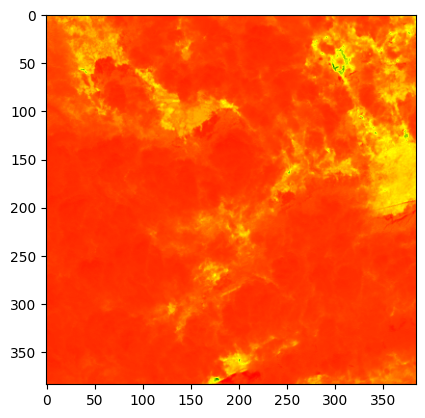

In [258]:
count=0

L = 1 - (2*band_nir+1-np.sqrt((2*band_nir+1)*(2*band_nir+1)-8*(band_nir-band_red)))/2
msavi = (band_nir.astype(float) - band_red.astype(float)) * (1 + L) / (band_nir + band_red + L)

rvi = band_nir / band_red

for i in range(384):
    for j in range(384):
        if rvi[i,j]>10: 
            count+=1
    
fig, ax = plt.subplots(num=1,clear=True)
norm = plt.Normalize(0, 5, clip=True)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow","green"])
plt.imshow(rvi, cmap=cmap)
count

In [98]:
pred = get_prediction('data/full_patch_179_8_by_11_LC08_L1TP_061009_20160720_20170223_01_T1.tif')

c:\Users\smart\Documents\veg_indexes_calc\.venv\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=d

In [72]:
with rasterio.open('data/gt_patch_179_8_by_11_LC08_L1TP_061009_20160720_20170223_01_T1.tif') as src:
    mask = src.read(1)
    
with rasterio.open('data/full_patch_179_8_by_11_LC08_L1TP_061009_20160720_20170223_01_T1.tif') as src:
    band_full = src.read()

c:\Users\smart\Documents\veg_indexes_calc\.venv\lib\site-packages\rasterio\__init__.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


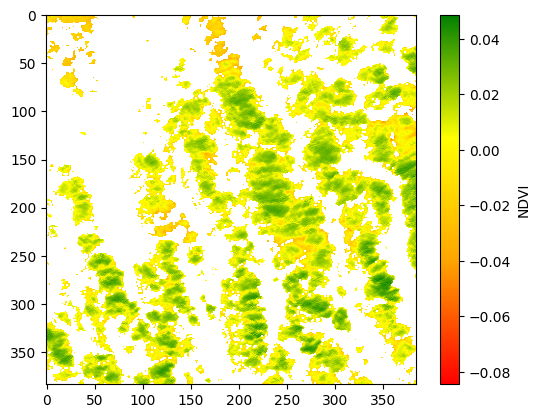

In [96]:
ndvi = NDVI_culc('data/full_patch_179_8_by_11_LC08_L1TP_061009_20160720_20170223_01_T1.tif')

fig, ax = plt.subplots(num=1,clear=True)
norm = plt.Normalize(-1, 1, clip=True)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow","green"])
masked = np.ma.masked_where(mask == 0, ndvi)
plt.imshow(masked, cmap=cmap)
plt.colorbar(label='NDVI')

In [58]:
masked = np.ma.masked_where(mask == 0, rvi)
masked


masked_array(
  data=[[1.3871309737400097, 1.4721717765196025, 1.6029682164433938, ...,
         2.392073778664008, 2.1459070670167826, 2.0155248059399256],
        [1.431022010953808, 1.4657960944051756, 1.5408149266017286, ...,
         2.4829280584603755, 2.4139911250326285, 2.2444357672784068],
        [1.524248496993988, 1.5118679050567596, 1.5252213576603166, ...,
         2.265806451612903, 2.34717868338558, 2.254802561366062],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

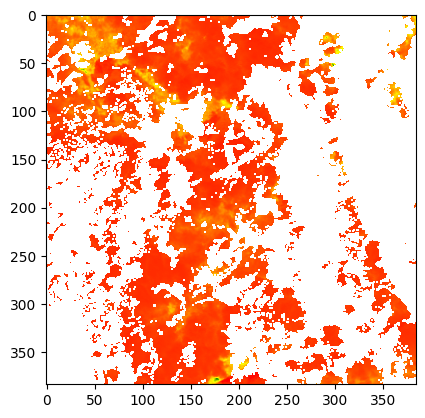

In [59]:
rvi = band_nir / band_red

for i in range(384):
    for j in range(384):
        if rvi[i,j]>10: 
            count+=1
    
fig, ax = plt.subplots(num=1,clear=True)
norm = plt.Normalize(0, 5, clip=True)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow","green"])
plt.imshow(masked, cmap=cmap)
plt.savefig('data/1.png')
#plt.imshow(masked)

In [15]:
a = np.array([[1, 0, 1], [0, 5, 0], [1, 2, 1]])
b = np.array([[1, 2, 0], [1, 0, 1], [2, 1, 1]])
(a.astype(float)-b.astype(float))/(a+b)

array([[ 0.        , -1.        ,  1.        ],
       [-1.        ,  1.        , -1.        ],
       [-0.33333333,  0.33333333,  0.        ]])

In [62]:
ab = (((band_nir-band_red)*1.5)/(band_nir+band_red+0.5))#[0,0]

for i in range(384):
    for j in range(384):
        if ab[i,j]>1 or ab[i,j]<-1:
            print(i, j, ab[i,j])

In [ ]:
((band_nir[0,0]-band_red[0,0])/(band_nir[0,0]+band_red[0,0]))#[0,0]

In [43]:
(band_nir[1,204].astype(float) - band_red[1,204].astype(float))/(band_nir[1,204].astype(float)+band_red[1,204].astype(float))

np.float64(-0.024155466763530694)

In [42]:
band_nir[1,204]+band_red[1,204]

C:\Users\smart\AppData\Local\Temp\ipykernel_50904\3676934312.py:1: RuntimeWarning: overflow encountered in scalar add
  band_nir[1,204]+band_red[1,204]


np.uint16(536)

In [38]:
band_red[1,204]

np.uint16(33834)

In [27]:
pred = np.array(pred)

for i in range(384):
    for j in range(384):
        if pred[i,j]>1:
            print(i,j)
